In [2]:
# Function for integreating ODE and displaying results
import scipy.integrate
from scipy.integrate import odeint
import matplotlib.pylab as plt
import numpy as np
import math
from math import exp
from ipywidgets import widgets, fixed, Layout

%matplotlib inline

In [3]:
def fNCX(y,k):
    VmaxNCX, KmCai, KmCao, KmNai, KmNao, ksat, eta, KdAct, HNa, nCai, Q10NCX = k 
    Cai, v = y
    R = 8.314 # [J/mol-K]
    T = 310 # [K]
    V = v*10**-3
    # NCX parameters taken from Shannon-Bers model
    KmCai = KmCai*1e-6     # [M]
    KmCao = KmCao*1e-3      # [M]
    KmNai = KmNai*1e-2    # [M]
    KmNao = KmNao*1e-2     # [M]
    QNCX = Q10NCX**((T-310)/10)
    Cm = 12e-12      # [F] total conductance of microglia
    F = 96485.33289   # Faraday constant in [C/mol]

    ## Fixted substance concentrations
    Nae = 145e-3        # [M] Exocytosolic Na free concentration
    Nai = 8e-3          # [M] Cytosolic Na free concentration -> Neuroglia p.190 Fig 16.4 the range from 8-20 mM
    Cae = 2e-3          # [M] Exocytosolic Ca free concentration

    ## Lumped constants/terms
    Ka = 1/(1+((KdAct/(Cai*1e6))**nCai)) # 3.2
    Z = (V*F)/(R*T)      # [J/C*C/mol]/[J/(mol-K)*K]
    delta = (Nai**HNa)*Cae
    sigma = (Nae**HNa)*Cai

    top = Ka*QNCX*VmaxNCX*(exp(eta*Z)*delta - exp((eta-1)*Z)*sigma)
    bot = (KmCai*(Nae**HNa)*(1+(Nai/KmNai)**HNa) + (KmNao**HNa)*Cai*(1+(Cai/KmCai)) + KmCao*(Nai**HNa)
           + delta + sigma)*(1 + ksat*exp((eta-1))*Z)

    ## Current and influx via NCX
    INCX = top/bot*Cm*10**12            # [A/F]*F = A

    return INCX


In [10]:
def run(VmaxNCX, KmCai, KmCao, KmNai, KmNao, ksat, eta, KdAct, HNa, nCai, Q10NCX):
    k = np.array([VmaxNCX, KmCai, KmCao, KmNai, KmNao, ksat, eta, KdAct, HNa, nCai, Q10NCX])
    V = scipy.linspace(-70,60,10)
    Irest = []
    Iact = []
    iters = np.arange(10)
    Carest = 0.1*10**-6# -> 100 nM in cytosol in [M]
    for i in iters:
        yr = np.array([Carest,V[i]])
        Ir = fNCX(yr,k)
        Irest = np.append(Irest,Ir)

    restingI = np.array([-20.53,-18.54,-17.22,-12.58,15.23,23.84,34.44])
    restingV = np.array([-100,-80,-60,-40,20,40,60])

    plt.figure(figsize=(7,7),dpi=100)
    plt.plot(V,Irest,'b-',linewidth = 2, label='Model',alpha=1)
    plt.plot(restingV,restingI,'r--',linewidth = 2, label='Boscia et al., - Expt',alpha=1)

    plt.ylabel("$I_{NCX}$ (pA)",fontsize=15)
    plt.xlabel("Potential (mV)",fontsize=15)
    plt.legend(loc=0,fontsize=12)
    plt.grid(True)
    #plt.xlim(-60,-0)
    #plt.ylim(-20,-10)
    
    return

In [11]:
%%html
<style type='text/css'>
.widget-inline-hbox .widget-label {
      max-width: 250px;
      min-width: 250px;
}
</style>

In [12]:
slider = widgets.interact(run, isadaptive=fixed(True),
        VmaxNCX=widgets.FloatSlider(min=0,max=100,step=0.01,value=35,description='VmaxNCX',layout=Layout(width='70%'), continuous_update = True),
        KmCai=widgets.FloatSlider(min=0,max=100,step=0.01,value=3.63,description='KmCai',layout=Layout(width='70%'), continuous_update = True),
        KmCao=widgets.FloatSlider(min=0,max=10,step=0.01,value=1.3,description='KmCao',layout=Layout(width='70%'), continuous_update = True),
        KmNai=widgets.FloatSlider(min=0,max=100,step=0.01,value=1.23,description='KmNai.',layout=Layout(width='70%'), continuous_update = True),
        KmNao=widgets.FloatSlider(min=0,max=100,step=0.01,value=8.75,description='KmNao',layout=Layout(width='70%'), continuous_update = True),
        ksat=widgets.FloatSlider(min=0,max=100,step=0.01,value=0.04,description='ksat',layout=Layout(width='70%'), continuous_update = True),
        eta=widgets.FloatSlider(min=0,max=100,step=0.01,value=0.70,description='eta',layout=Layout(width='70%'), continuous_update = True),
        KdAct=widgets.FloatSlider(min=0,max=100,step=0.01,value=0.04,description='KdAct',layout=Layout(width='70%'), continuous_update = True),
        HNa=widgets.FloatSlider(min=0,max=100,step=0.01,value=3.60,description='HNa',layout=Layout(width='70%'), continuous_update = True),
        nCai=widgets.FloatSlider(min=0,max=100,step=0.01,value=3.44,description='nCai',layout=Layout(width='70%'), continuous_update = True),
        Q10NCX=widgets.FloatSlider(min=0,max=100,step=0.01,value=1.20,description='Q10NCX',layout=Layout(width='70%'), continuous_update = True))

A Jupyter Widget

In [1]:
V = scipy.linspace(-120,60,10)
Irest = []
Iact = []
iters = np.arange(10)
Carest = 0.1 # -> 100 nM in cytosol
Caactiv = 0.18
for i in iters:
    yr = np.array([Carest,V[i]])
    Ir = fNCX(yr)
    Irest = np.append(Irest,Ir)
    ya = np.array([Caactiv,V[i]])
    Ia = fNCX(ya)
    Iact = np.append(Iact,Ia)

plt.figure(figsize=(7,7))
plt.plot(V,Irest,'r-',label='Model-Rest',alpha=1)
plt.plot(V,Iact,'b-',label='Model-Activ',alpha=1)
plt.plot([-120,60],[0,0],'k--')
plt.plot([-23,-23],[-500,500],'k--')
#plt.plot(restingV,restingI,'r--',label='Expt-Rest',alpha=1)
#plt.plot(activeV,activeI,'b--',label='Expt-Activ',alpha=1)
plt.ylabel("$I_{NCX}$ (pA)",fontsize=15)
plt.xlabel("Potential (mV)",fontsize=15)
plt.legend(loc=0,fontsize=12)
#plt.xlim(-50,60)
#plt.ylim(-50,50)

NameError: name 'scipy' is not defined

NameError: name 'activeV' is not defined

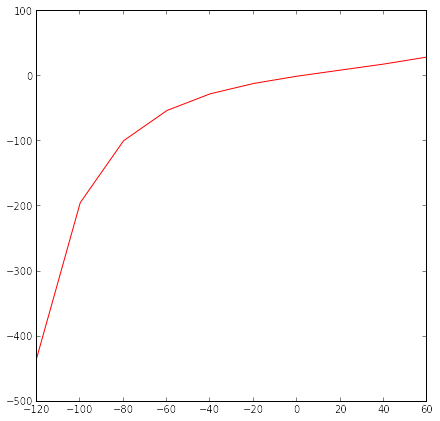

In [5]:
V = scipy.linspace(-120,60,10)
Irest = []
iters = np.arange(10)
Carest = 160e-9 # -> 100 nM in cytosol

for i in iters:
    y = np.array([Carest,V[i]])
    I = fNCX(y)
    Irest = np.append(Irest,I)

plt.figure(figsize=(7,7))
plt.plot(V,Irest,'r-',label='Model',alpha=1)
plt.plot(activeV,activeI,'r--',label='Expt',alpha=1)
plt.ylabel("$I_{NCX}$ (pA)",fontsize=15)
plt.xlabel("Potential (mV)",fontsize=15)
plt.legend(loc=0,fontsize=12)

